
<a id='julia-essentials'></a>
How to read this lecture…

- For some notebooks, enable content with “Trust” on the command tab of Jupyter lab  
- Code should execute sequentially if run in a Jupyter notebook  
- Please direct feedback to [contact@quantecon.org](mailto:contact@quantecon.org") or [discourse forum](http://discourse.quantecon.org/)  

# Julia Essentials

## Contents

- [Julia Essentials](#Julia-Essentials)  
  - [Overview](#Overview)  
  - [Common Data Types](#Common-Data-Types)  
  - [Iterating](#Iterating)  
  - [Comparisons and Logical Operators](#Comparisons-and-Logical-Operators)  
  - [User-Defined Functions](#User-Defined-Functions)  
  - [Broadcasting](#Broadcasting)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

Having covered a few examples, let’s now turn to a more systematic exposition
of the essential features of the language

## Overview

Topics:

- Common data types  
- Iteration  
- More on user-defined functions  
- Comparisons and logic  

## Common Data Types

Like most languages, Julia language defines and provides functions for operating on standard data types such as

- integers  
- floats  
- strings  
- arrays, etc…  


Let’s learn a bit more about them

### Primitive Data Types

Activate the project environment, ensuring that `Project.toml` and `Manifest.toml` are in the same location as your notebook

In [1]:
using Pkg; Pkg.activate(@__DIR__); #activate environment in the notebook's location

A particularly simple data type is a Boolean value, which can be either `true` or
`false`

In [2]:
x = true

true

In [3]:
typeof(x)

Bool

In [4]:
y = 1 > 2  # Now y = false

false

The two most common data types used to represent numbers are integers and
floats

(Computers distinguish between floats and integers because arithmetic is
handled in a different way)

In [5]:
typeof(1.0)

Float64

In [6]:
typeof(1)

Int64

If you’re running a 32 bit system you’ll still see `Float64`, but you will see `Int32` instead of `Int64` (see [the section on Integer types](https://docs.julialang.org/en/stable/manual/integers-and-floating-point-numbers/#Integers-1) from the Julia manual)

Arithmetic operations are fairly standard

In [7]:
x = 2; y = 1.0;

The `;` can be used to supress  output from a line of code, or to combine two lines of code together (as above), but is otherwise not necessary

In [8]:
x * y

2.0

In [9]:
x^2

4

In [10]:
y / x

0.5

Although the `*` can be omitted for multiplication between a numeric literal and a variable

In [11]:
2x - 3y

1.0

Complex numbers are another primitive data type, with the imaginary part being specified by `im`

In [12]:
x = 1 + 2im

1 + 2im

In [13]:
y = 1 - 2im

1 - 2im

In [14]:
x * y  # Complex multiplication

5 + 0im

There are several more primitive data types that we’ll introduce as necessary

### Strings

A string is a data type for storing a sequence of characters

In [15]:
x = "foobar"

"foobar"

In [16]:
typeof(x)

String

You’ve already seen examples of Julia’s simple string formatting operations

In [17]:
x = 10; y = 20

20

The `$` inside of a string is used to interpolate a variable

In [18]:
"x = $x"

"x = 10"

With brackets, you can splice the results of expressions into strings as well

In [19]:
"x + y = $(x + y)"

"x + y = 30"

To concatenate strings use `*`

In [20]:
"foo" * "bar"

"foobar"

Julia provides many functions for working with strings

In [21]:
s = "Charlie don't surf"

"Charlie don't surf"

In [22]:
split(s)

3-element Array{SubString{String},1}:
 "Charlie"
 "don't"  
 "surf"   

In [23]:
replace(s, "surf" => "ski")

"Charlie don't ski"

In [24]:
split("fee,fi,fo", ",")

3-element Array{SubString{String},1}:
 "fee"
 "fi" 
 "fo" 

In [25]:
strip(" foobar ")  # Remove whitespace

"foobar"

Julia can also find and replace using [regular expressions](https://en.wikipedia.org/wiki/Regular_expression) ([see the documentation](https://docs.julialang.org/en/stable/manual/strings/#Regular-Expressions-1) on regular expressions for more info)

In [26]:
match(r"(\d+)", "Top 10")  # Find digits in string

RegexMatch("10", 1="10")

### Containers

Julia has several basic types for storing collections of data

We have already discussed arrays

A related data type is **tuples**, which are immutable and can contain different types

In [27]:
x = ("foo", "bar")
y = ("foo", 2)

("foo", 2)

In [28]:
typeof(x), typeof(y)

(Tuple{String,String}, Tuple{String,Int64})

An immutable object is one that cannot be altered once it resides in memory

In particular, tuples do not support item assignment (i.e. `x[1] = "test"` would fail)

Tuples can be constructed with or without parenthesis, which is used for returning multiple values from a function

In [29]:
x = "foo", 1

("foo", 1)

In [30]:
function f()
    return "foo", 1
end
f()

("foo", 1)

Tuples can also be unpacked directly into variables

In [31]:
x = ("foo", 1)

("foo", 1)

In [32]:
word, val = x
println("word = $word, val = $val")

word = foo, val = 1


Tuples can be created with a hanging `,`–which is used to create a tuple with one element

In [33]:
x = ("foo", 1,)
y = ("foo",)
typeof(x), typeof(y)

(Tuple{String,Int64}, Tuple{String})

#### Referencing Items

The last element of a sequence type can be accessed with the keyword `end`

In [34]:
x = [10, 20, 30, 40]

4-element Array{Int64,1}:
 10
 20
 30
 40

In [35]:
x[end]

40

In [36]:
x[end-1]

30

To access multiple elements of an array or tuple, you can use slice notation

In [37]:
x[1:3]

3-element Array{Int64,1}:
 10
 20
 30

In [38]:
x[2:end]

3-element Array{Int64,1}:
 20
 30
 40

The same slice notation works on strings

In [39]:
"foobar"[3:end]

"obar"

#### Dictionaries

Another container type worth mentioning is dictionaries

Dictionaries are like arrays except that the items are named instead of numbered

In [40]:
d = Dict("name" => "Frodo", "age" => 33)

Dict{String,Any} with 2 entries:
  "name" => "Frodo"
  "age"  => 33

In [41]:
d["age"]

33

The strings `name` and `age` are called the **keys**

The objects that the keys are mapped to (`"Frodo"` and `33`) are called the **values**

They can be accessed via `keys(d)` and `values(d)` respectively

There’s a neat interface to this in Julia, which takes us to our next topic


<a id='iterating-version-1'></a>

## Iterating

One of the most important tasks in computing is stepping through a
sequence of data and performing a given action

Julia’s provides neat, flexible tools for iteration as we now discuss

### Iterables

An iterable is something you can put on the right hand side of `for` and loop over

These include sequence data types like arrays

In [42]:
actions = ["surf", "ski"]
for action in actions
    println("Charlie don't $action")
end

Charlie don't surf
Charlie don't ski


They also include so-called **iterators**

You’ve already come across these types of objects

In [43]:
for i in 1:3
    print(i)
end

123

If you ask for the keys of dictionary you get an iterator

In [44]:
d = Dict("name" => "Frodo", "age" => 33)

Dict{String,Any} with 2 entries:
  "name" => "Frodo"
  "age"  => 33

In [45]:
keys(d)

Base.KeySet for a Dict{String,Any} with 2 entries. Keys:
  "name"
  "age"

This makes sense, since the most common thing you want to do with keys is loop over them

The benefit of providing an iterator rather than an array, say, is that the former is more memory efficient

Should you need to transform an iterator into an array you can always use `collect()`

In [46]:
collect(keys(d))

2-element Array{String,1}:
 "name"
 "age" 

### Looping without Indices

You can loop over sequences without explicit indexing, which often leads to
neater code

For example compare

In [47]:
x_values = 1:5

1:5

In [48]:
for x in x_values
    println(x * x)
end

1
4
9
16
25


In [49]:
for i in eachindex(x_values)
    println(x_values[i] * x_values[i])
end

1
4
9
16
25


Julia provides some functional-style helper functions (similar to Python and R) to facilitate looping without indices

One is `zip()`, which is used for stepping through pairs from two sequences

For example, try running the following code

In [50]:
countries = ("Japan", "Korea", "China")
cities = ("Tokyo", "Seoul", "Beijing")
for (country, city) in zip(countries, cities)
    println("The capital of $country is $city")
end

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


If we happen to need the index as well as the value, one option is to use `enumerate()`

The following snippet will give you the idea

In [51]:
countries = ("Japan", "Korea", "China")
cities = ("Tokyo", "Seoul", "Beijing")
for (i, country) in enumerate(countries)
    city = cities[i]
    println("The capital of $country is $city")
end

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


### Comprehensions

Comprehensions are an elegant tool for creating new arrays or dictionaries from iterables

Here’s some examples

In [52]:
doubles = [ 2i for i in 1:4 ]

4-element Array{Int64,1}:
 2
 4
 6
 8

In [53]:
animals = ["dog", "cat", "bird"];   # Semicolon suppresses output

In [54]:
plurals = [ animal * "s" for animal in animals ]

3-element Array{String,1}:
 "dogs" 
 "cats" 
 "birds"

In [55]:
[ i + j for i in 1:3, j in 4:6 ]

3×3 Array{Int64,2}:
 5  6  7
 6  7  8
 7  8  9

In [56]:
[ i + j + k for i in 1:3, j in 4:6, k in 7:9 ]

3×3×3 Array{Int64,3}:
[:, :, 1] =
 12  13  14
 13  14  15
 14  15  16

[:, :, 2] =
 13  14  15
 14  15  16
 15  16  17

[:, :, 3] =
 14  15  16
 15  16  17
 16  17  18

The same kind of expression works for dictionaries

In [57]:
Dict(string(i) => i for i in 1:3)

Dict{String,Int64} with 3 entries:
  "1" => 1
  "2" => 2
  "3" => 3

## Comparisons and Logical Operators

### Comparisons

As we saw earlier, when testing for equality we use `==`

In [58]:
x = 1

1

In [59]:
x == 2

false

For “not equal” use `!=` or `≠`

In [60]:
x != 3

true

In many languages you can use integers or other values when testing conditions but Julia more rigorously enforces booleans
.. This looked a little odd when reading
.. .. code-block:: julia
..     :class: no-execute
..
..     while 0 println(“foo”) end
..
..
.. .. code-block:: julia
..     :class: no-execute
..
..     if 1 print(“foo”) end

### Combining Expressions

Here are the standard logical connectives (conjunction, disjunction)

In [61]:
true && false

false

In [62]:
true || false

true

Remember

- `P && Q` is `true` if both are `true`, otherwise it’s `false`  
- `P || Q` is `false` if both are `false`, otherwise it’s `true`  

## User-Defined Functions

Let’s talk a little more about user-defined functions

User-defined functions are important for improving the clarity of your code by

- separating different strands of logic  
- facilitating code reuse (writing the same thing twice is always a bad idea)  


Julia functions are convenient:

- Any number of functions can be defined in a given file  
- Any “value” can be passed to a function as an argument, including other functions  
- Functions can be (and often are) defined inside other functions  
- A function can return any kind of value, including functions  


We’ll see many examples of these structures in the following lectures

For now let’s just cover some of the different ways of defining functions

### Return Statement

In Julia, the `return` statement is optional, so that the following functions
have identical behavior

In [63]:
function f1(a, b)
    return a * b
end

function f2(a, b)
    a * b
end

f2 (generic function with 1 method)

When no return statement is present, the last value obtained when executing the code block is returned

Although some prefer the second option, we often favor the former on the basis that explicit is better than implicit

A function can have arbitrarily many `return` statements, with execution terminating when the first return is hit

You can see this in action when experimenting with the following function

In [64]:
function foo(x)
    if x > 0
        return "positive"
    end
    return "nonpositive"
end

foo (generic function with 1 method)

### Other Syntax for Defining Functions

For short function definitions Julia offers some attractive simplified syntax

First, when the function body is a simple expression, it can be defined
without the `function` keyword or `end`

In [65]:
f(x) = sin(1 / x)

f (generic function with 2 methods)

Let’s check that it works

In [66]:
f(1 / pi)

1.2246467991473532e-16

Julia also allows for you to define anonymous functions

For example, to define `f(x) = sin(1 / x)` you can use `x -> sin(1 / x)`

The difference is that the second function has no name bound to it

How can you use a function with no name?

Typically it’s as an argument to another function

In [67]:
map(x -> sin(1 / x), randn(3))  # Apply function to each element

3-element Array{Float64,1}:
 0.9695656963037595
 0.4847001036345594
 0.6017552492400151

### Optional and Keyword Arguments

Function arguments can be given default values

In [68]:
f(x, a = 1) = exp(cos(a * x))

f (generic function with 3 methods)

If the argument is not supplied the default value is substituted

In [69]:
f(pi)

0.36787944117144233

In [70]:
f(pi, 2)

2.718281828459045

Another option is to use **keyword** arguments

The difference between keyword and standard (positional) arguments is that
they are parsed and bound by name rather than order in the function call

For example, in the call

In [71]:
f(x; a = 1) = exp(cos(a * x)) #Note the ; in the definition

f(pi, a = 2) #Calling with ; is usually optional and generally discouraged

2.718281828459045

## Broadcasting

A common scenario in computing is that

- we have a function `f` such that `f(x)` returns a number for any number `x`  
- we wish to apply `f` to every element of an iterable `x_vec` to produce a new result `y_vec`  


In Julia loops are fast and we can do this easily enough with a loop

For example, suppose that we want to apply `sin` to `x_vec = [2.0, 4.0, 6.0, 8.0]`

The following code will do the job

In [72]:
x_vec = [2.0, 4.0, 6.0, 8.0]
y_vec = similar(x_vec)
for (i, x) in enumerate(x_vec)
    y_vec[i] = sin(x)
end

But this is a bit unwieldy so Julia offers the alternative syntax

In [73]:
y_vec = sin.(x_vec)

4-element Array{Float64,1}:
  0.9092974268256817 
 -0.7568024953079282 
 -0.27941549819892586
  0.9893582466233818 

More generally, if `f` is any Julia function, then `f.` references the broadcasted version

Conveniently, this applies to user-defined functions as well

To illustrate, let’s write a function `chisq` such that `chisq(k)` returns a chi-squared random variable with `k` degrees of freedom when `k` is an integer

In doing this we’ll exploit the fact that, if we take `k` independent standard normals, square them all and sum, we get a chi-squared with `k` degrees of freedom

In [74]:
function chisq(k)
    @assert k > 0
    z = randn(k)
    return sum(z -> z^2, z) # same as `sum(x^2 for x in z)`
end

chisq (generic function with 1 method)

The macro `@assert` will check that the next expression evaluates to ``true`, and will stop and display an error otherwise

In [75]:
chisq(3)

5.560928607044203

Note that calls with integers less than 1 will trigger an assertion failure inside
the function body

```julia
chisq(-2)
```


Let’s try this out on an array of integers, adding the broadcast

In [76]:
chisq.([2, 4, 6])

3-element Array{Float64,1}:
 4.682449486927036
 4.102451035658698
 5.455964052296663

## Exercises


<a id='pyess-ex1'></a>

### Exercise 1

Part 1: Given two numeric arrays or tuples `x_vals` and `y_vals` of equal length, compute
their inner product using `zip()`

Part 2: Using a comprehension, count the number of even numbers between 0 and 99

- Hint: `iseven` returns `true` for even numbers and `false` for odds.  


Part 3: Using a comprehension, take `pairs = ((2, 5), (4, 2), (9, 8), (12, 10))` and count the number of pairs `(a, b)` such that both `a` and `b` are even


<a id='pyess-ex2'></a>

### Exercise 2

Consider the polynomial


<a id='equation-polynom0'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
p(x)
= a_0 + a_1 x + a_2 x^2 + \cdots a_n x^n
= \sum_{i=0}^n a_i x^i
$$
</td><td width=10% style='text-align:center !important;'>
(1)
</td></tr></table>

Using `enumerate()` in your loop, write a function `p` such that `p(x, coeff)` computes the value in [(1)](#equation-polynom0) given a point `x` and an array of coefficients `coeff`


<a id='pyess-ex3'></a>

### Exercise 3

Write a function that takes a string as an argument and returns the number of capital letters in the string

Hint: `uppercase("foo")` returns `"FOO"`


<a id='pyess-ex4'></a>

### Exercise 4

Write a function that takes two sequences `seq_a` and `seq_b` as arguments and
returns `true` if every element in `seq_a` is also an element of `seq_b`, else
`false`

- By “sequence” we mean an array, tuple or string  



<a id='pyess-ex5'></a>

### Exercise 5

The Julia libraries include functions for interpolation and approximation

Nevertheless, let’s write our own function approximation routine as an exercise

In particular, write a function `linapprox` that takes as arguments

- A function `f` mapping some interval $ [a, b] $ into $ \mathbb R $  
- two scalars `a` and `b` providing the limits of this interval  
- An integer `n` determining the number of grid points  
- A number `x` satisfying `a ≤ x ≤ b`  


and returns the [piecewise linear interpolation](https://en.wikipedia.org/wiki/Linear_interpolation) of `f` at `x`, based on `n` evenly spaced grid points `a = point[1] < point[2] < ... < point[n] = b`

Aim for clarity, not efficiency

Hint: use the function `range` to linearly space numbers

### Exercise 6

The following data lists US cities and their populations

Copy this text into a text file called `us_cities.txt` and save it in your present working directory

- That is, save it in the location Julia returns when you call `pwd()`  


This can also be achieved by running the following Julia code:

In [77]:
open("us_cities.txt", "w") do f
  write(f,
"new york: 8244910
los angeles: 3819702
chicago: 2707120
houston: 2145146
philadelphia: 1536471
phoenix: 1469471
san antonio: 1359758
san diego: 1326179
dallas: 1223229")
end

167

Write a program to calculate total population across these cities

Hints:

- If `f` is a file object then `eachline(f)` provides an iterable that steps you through the lines in the file  
- `parse(Int, "100")` converts the string `"100"` into an integer  

## Solutions

### Exercise 1

Part 1 solution:

Here’s one possible solution

In [78]:
x_vals = [1, 2, 3]
y_vals = [1, 1, 1]
sum(x * y for (x, y) in zip(x_vals, y_vals))

6

Part 2 solution:

One solution is

In [79]:
sum(iseven, 0:99)

50

Part 3 solution:

Here’s one possibility

In [80]:
pairs = ((2, 5), (4, 2), (9, 8), (12, 10))
sum(xy -> all(iseven, xy), pairs)

2

### Exercise 2

In [81]:
p(x, coeff) = sum(a * x^(i-1) for (i, a) in enumerate(coeff))

p (generic function with 1 method)

In [82]:
p(1, (2, 4))

6

### Exercise 3

Here’s one solutions:

In [83]:
function f_ex3(string)
    count = 0
    for letter in string
        if (letter == uppercase(letter)) && isletter(letter)
            count += 1
        end
    end
    return count
end

f_ex3("The Rain in Spain")

3

### Exercise 4

Here’s one solutions:

In [84]:
function f_ex4(seq_a, seq_b)
    is_subset = true
    for a in seq_a
        if a ∉ seq_b
            is_subset = false
        end
    end
    return is_subset
end

# == test == #

println(f_ex4([1, 2], [1, 2, 3]))
println(f_ex4([1, 2, 3], [1, 2]))

true
false


if we use the Set data type then the solution is easier

In [85]:
f_ex4_2(seq_a, seq_b) = Set(seq_a) ⊆ Set(seq_b) # \subseteq (⊆) is unicode for `issubset`

println(f_ex4_2([1, 2], [1, 2, 3]))
println(f_ex4_2([1, 2, 3], [1, 2]))

true
false


### Exercise 5

In [86]:
function linapprox(f, a, b, n, x)
    #=
    Evaluates the piecewise linear interpolant of f at x on the interval
    [a, b], with n evenly spaced grid points.

    =#
    length_of_interval = b - a
    num_subintervals = n - 1
    step = length_of_interval / num_subintervals

    # === find first grid point larger than x === #
    point = a
    while point ≤ x
        point += step
    end

    # === x must lie between the gridpoints (point - step) and point === #
    u, v = point - step, point

    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)
end

linapprox (generic function with 1 method)

Let’s test it

In [87]:
f_ex5(x) = x^2
g_ex5(x) = linapprox(f_ex5, -1, 1, 3, x)

g_ex5 (generic function with 1 method)

In [92]:
using Plots

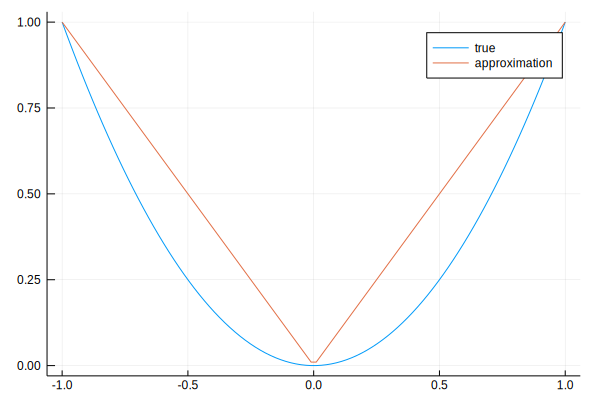

In [89]:
x_grid = range(-1, stop = 1, length = 100)
y_vals = f_ex5.(x_grid)
y_approx = g_ex5.(x_grid)
plot(x_grid, y_vals, label = "true")
plot!(x_grid, y_approx, label = "approximation")

### Exercise 6

In [90]:
f_ex6 = open("us_cities.txt", "r")
total_pop = 0
for line in eachline(f_ex6)
    city, population = split(line, ':')            # Tuple unpacking
    total_pop += parse(Int, population)
end
close(f_ex6)
println("Total population = $total_pop")

Total population = 23831986
